In [18]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import re

In [19]:
data = pd.read_csv("https://github.com/Adkurrr/betweeness_centrality/blob/main/pemilu2024.csv?raw=true", delimiter= ';')
data

created_at               id_str  \
0     Tue Oct 31 05:47:56 +0000 2023  1719229696783884609   
1     Tue Oct 31 05:47:55 +0000 2023  1719229695508799564   
2     Tue Oct 31 05:47:49 +0000 2023  1719229669038489899   
3     Tue Oct 31 05:47:43 +0000 2023  1719229641842717095   
4     Tue Oct 31 05:47:42 +0000 2023  1719229638390775860   
...                              ...                  ...   
1007  Tue Oct 31 02:42:52 +0000 2023  1719183123240616263   
1008  Tue Oct 31 02:42:24 +0000 2023  1719183008761082074   
1009  Tue Oct 31 02:42:24 +0000 2023  1719183008165712001   
1010  Tue Oct 31 02:41:21 +0000 2023  1719182744792817765   
1011  Tue Oct 31 02:40:19 +0000 2023  1719182481419911371   

                                              full_text  quote_count  \
0     tanggal pemungutan suara, ajakan ke TPS, menyo...            0   
1     Kaum muda memiliki peran penting dalam mencapa...            0   
2     @ZulkifliLubis69 @aniesbaswedan @prabowo @ganj...            0   
3     Tantangan geopolitik global seperti perang Rus...            0   
4     #TemanPemilih, kamu perlu tahu, Tim I Kirab Pe...            0   
...                                                 ...          ...   
1007  Rocky Gerung Beberkan Kebusukan Jokowi Terhada...            0   
1008    Sosialisasi Pemilu 2024 https://t.co/ys5oCoolMT            0   
1009  Halo Sobat Humas Polda Sumsel !!!   Sudah Tahu...            1   
1010  Top News: Jokowi Makan Bersama 3 Capres, Isu S...            0   
1011  Sosialisasi Pemilu 2024 oleh Pps Desa Dukun  #...            0   

      reply_count  retweet_count  favorite_count lang          user_id_str  \
0               1              0               0   in           2413697946   
1               0              0               0   in  1504761230916943875   
2               0              0               0   in            228561850   
3               0              0               0   in  1594525465817251840   
4               1              0               0   in           2413697946   
...           ...            ...             ...  ...                  ...   
1007            0              0               0   in  1225432911899324419   
1008            0              0               0   in  1632196194679283712   
1009            0              1               2   in  1463305353773289477   
1010            1              0               0   in            552523769   
1011            0              0               0   in  1632196194679283712   

      conversation_id_str         username  \
0     1719229638390775860           KPU_ID   
1     1719229695508799564  RachmansyahVito   
2     1718895996355371368       mhidayat72   
3     1719229641842717095  AyuandiraGusti1   
4     1719229638390775860           KPU_ID   
...                   ...              ...   
1007  1719183123240616263        RepelitaO   
1008  1719183008761082074     ppsdesadukun   
1009  1719183008165712001     sumsel_polda   
1010  1719182744792817765     KATADATAcoid   
1011  1719182481419911371     ppsdesadukun   

                                              tweet_url  
0     https://twitter.com/KPU_ID/status/171922969678...  
1     https://twitter.com/RachmansyahVito/status/171...  
2     https://twitter.com/mhidayat72/status/17192296...  
3     https://twitter.com/AyuandiraGusti1/status/171...  
4     https://twitter.com/KPU_ID/status/171922963839...  
...                                                 ...  
1007  https://twitter.com/RepelitaO/status/171918312...  
1008  https://twitter.com/ppsdesadukun/status/171918...  
1009  https://twitter.com/sumsel_polda/status/171918...  
1010  https://twitter.com/KATADATAcoid/status/171918...  
1011  https://twitter.com/ppsdesadukun/status/171918...  

[1012 rows x 12 columns]

In [20]:
jumlah_values_per_atribut = data.nunique()

print(jumlah_values_per_atribut)

created_at              973
id_str                 1012
full_text               982
quote_count               8
reply_count              12
retweet_count            16
favorite_count           25
lang                      2
user_id_str             671
conversation_id_str     940
username                671
tweet_url              1012
dtype: int64


In [21]:
# Membuat graf baru
G = nx.Graph()

# Menambahkan node dan edge ke graf berdasarkan data
for index, row in data.iterrows():
    # Tambahkan node user_id_str
    G.add_node(row['username'])

    # Tambahkan edge dengan atribut reply_count, retweet_count, dan favorite_count
    G.add_edge(row['username'], 'reply_count', weight=row['reply_count'])
    G.add_edge(row['username'], 'retweet_count', weight=row['retweet_count'])
    G.add_edge(row['username'], 'favorite_count', weight=row['favorite_count'])

In [22]:
# Menambahkan edge berdasarkan mention dalam full_text
mention_pattern = re.compile(r'@(\w+)')
for index, row in data.iterrows():
    mentions = re.findall(mention_pattern, row['full_text'])
    for mention in mentions:
        G.add_edge(row['username'], mention, weight=1)

In [23]:
# Menghitung jumlah node dan edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Menampilkan hasil
print("Jumlah Node:", num_nodes)
print("Jumlah Edges:", num_edges)

Jumlah Node: 752
Jumlah Edges: 2165


In [24]:
# Menghitung nilai betweenness centrality tanpa 'reply_count', 'retweet_count', dan 'favorite_count'
exclude_nodes = ['reply_count', 'retweet_count', 'favorite_count']
filtered_nodes = [node for node in G.nodes() if node not in exclude_nodes]
betweenness_centrality = nx.betweenness_centrality(G.subgraph(filtered_nodes))

# Membuat kamus pemetaan username ke user_id_str
username_to_user_id = dict(zip(data['username'], data['user_id_str']))

# Mengganti tampilan node dalam hasil betweenness centrality
for node in exclude_nodes:
    if node.startswith('@'):
        # Mendapatkan user_id_str dari username
        user_id_str = username_to_user_id.get(node[1:])

        # Mengganti nama node dalam hasil betweenness centrality
        if user_id_str:
            betweenness_centrality[user_id_str] = betweenness_centrality.pop(node)

# Menampilkan 10 nilai betweenness centrality teratas
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
for node, centrality in sorted_betweenness:
    print(f"Node: {node}, Betweenness Centrality: {centrality}")

Node: jokowi, Betweenness Centrality: 0.0026263700076598717
Node: YogiIsk99022685, Betweenness Centrality: 0.0021458382549807073
Node: prabowo, Betweenness Centrality: 0.0019257063906248882
Node: DwiSeti10297267, Betweenness Centrality: 0.001922425292375682
Node: SobatKeren24, Betweenness Centrality: 0.001914968250900214
Node: aniesbaswedan, Betweenness Centrality: 0.0018341339213061394
Node: AbankTho2, Betweenness Centrality: 0.0014854426619132501
Node: ganjarpranowo, Betweenness Centrality: 0.0012214633936816776
Node: Metro_TV, Betweenness Centrality: 0.00121639260547836
Node: KPU_ID, Betweenness Centrality: 0.001177615989805926


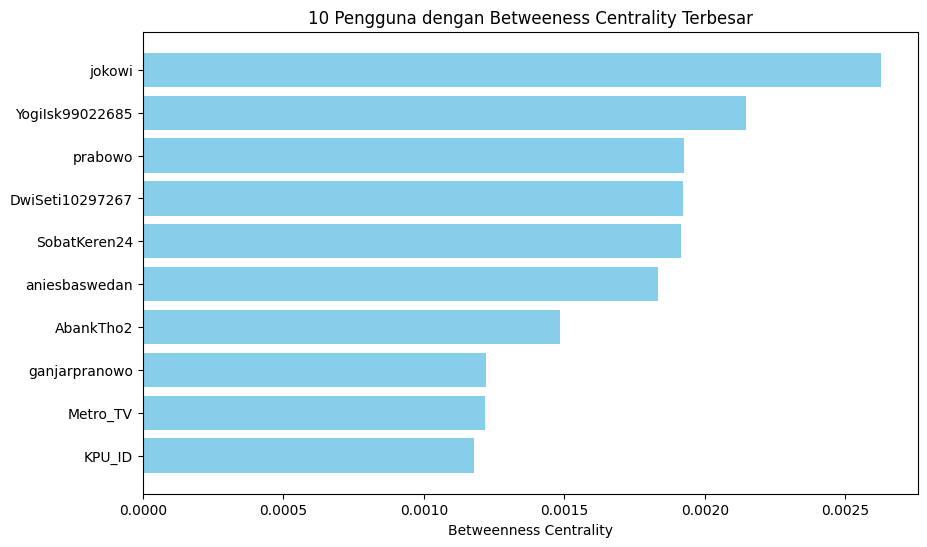

In [25]:
# Menyusun data untuk visualisasi
top_users = [node[0] for node in sorted_betweenness]
centrality_values = [node[1] for node in sorted_betweenness]

# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.barh(top_users, centrality_values, color='skyblue')
plt.xlabel('Betweenness Centrality')
plt.title('10 Pengguna dengan Betweeness Centrality Terbesar')
plt.gca().invert_yaxis()  # Untuk mengurutkan dari nilai tertinggi ke terendah
plt.show()

In [26]:
def draw_graph(G, size):
  nodes = G.nodes()
  pos = nx.spring_layout(G, k=0.70, iterations=60)
  plt.figure(figsize=size)
  nx.draw_networkx(G, pos=pos, node_color='skyblue', node_size=3000, edge_color='#FFDEA2', width=5)
  plt.show()

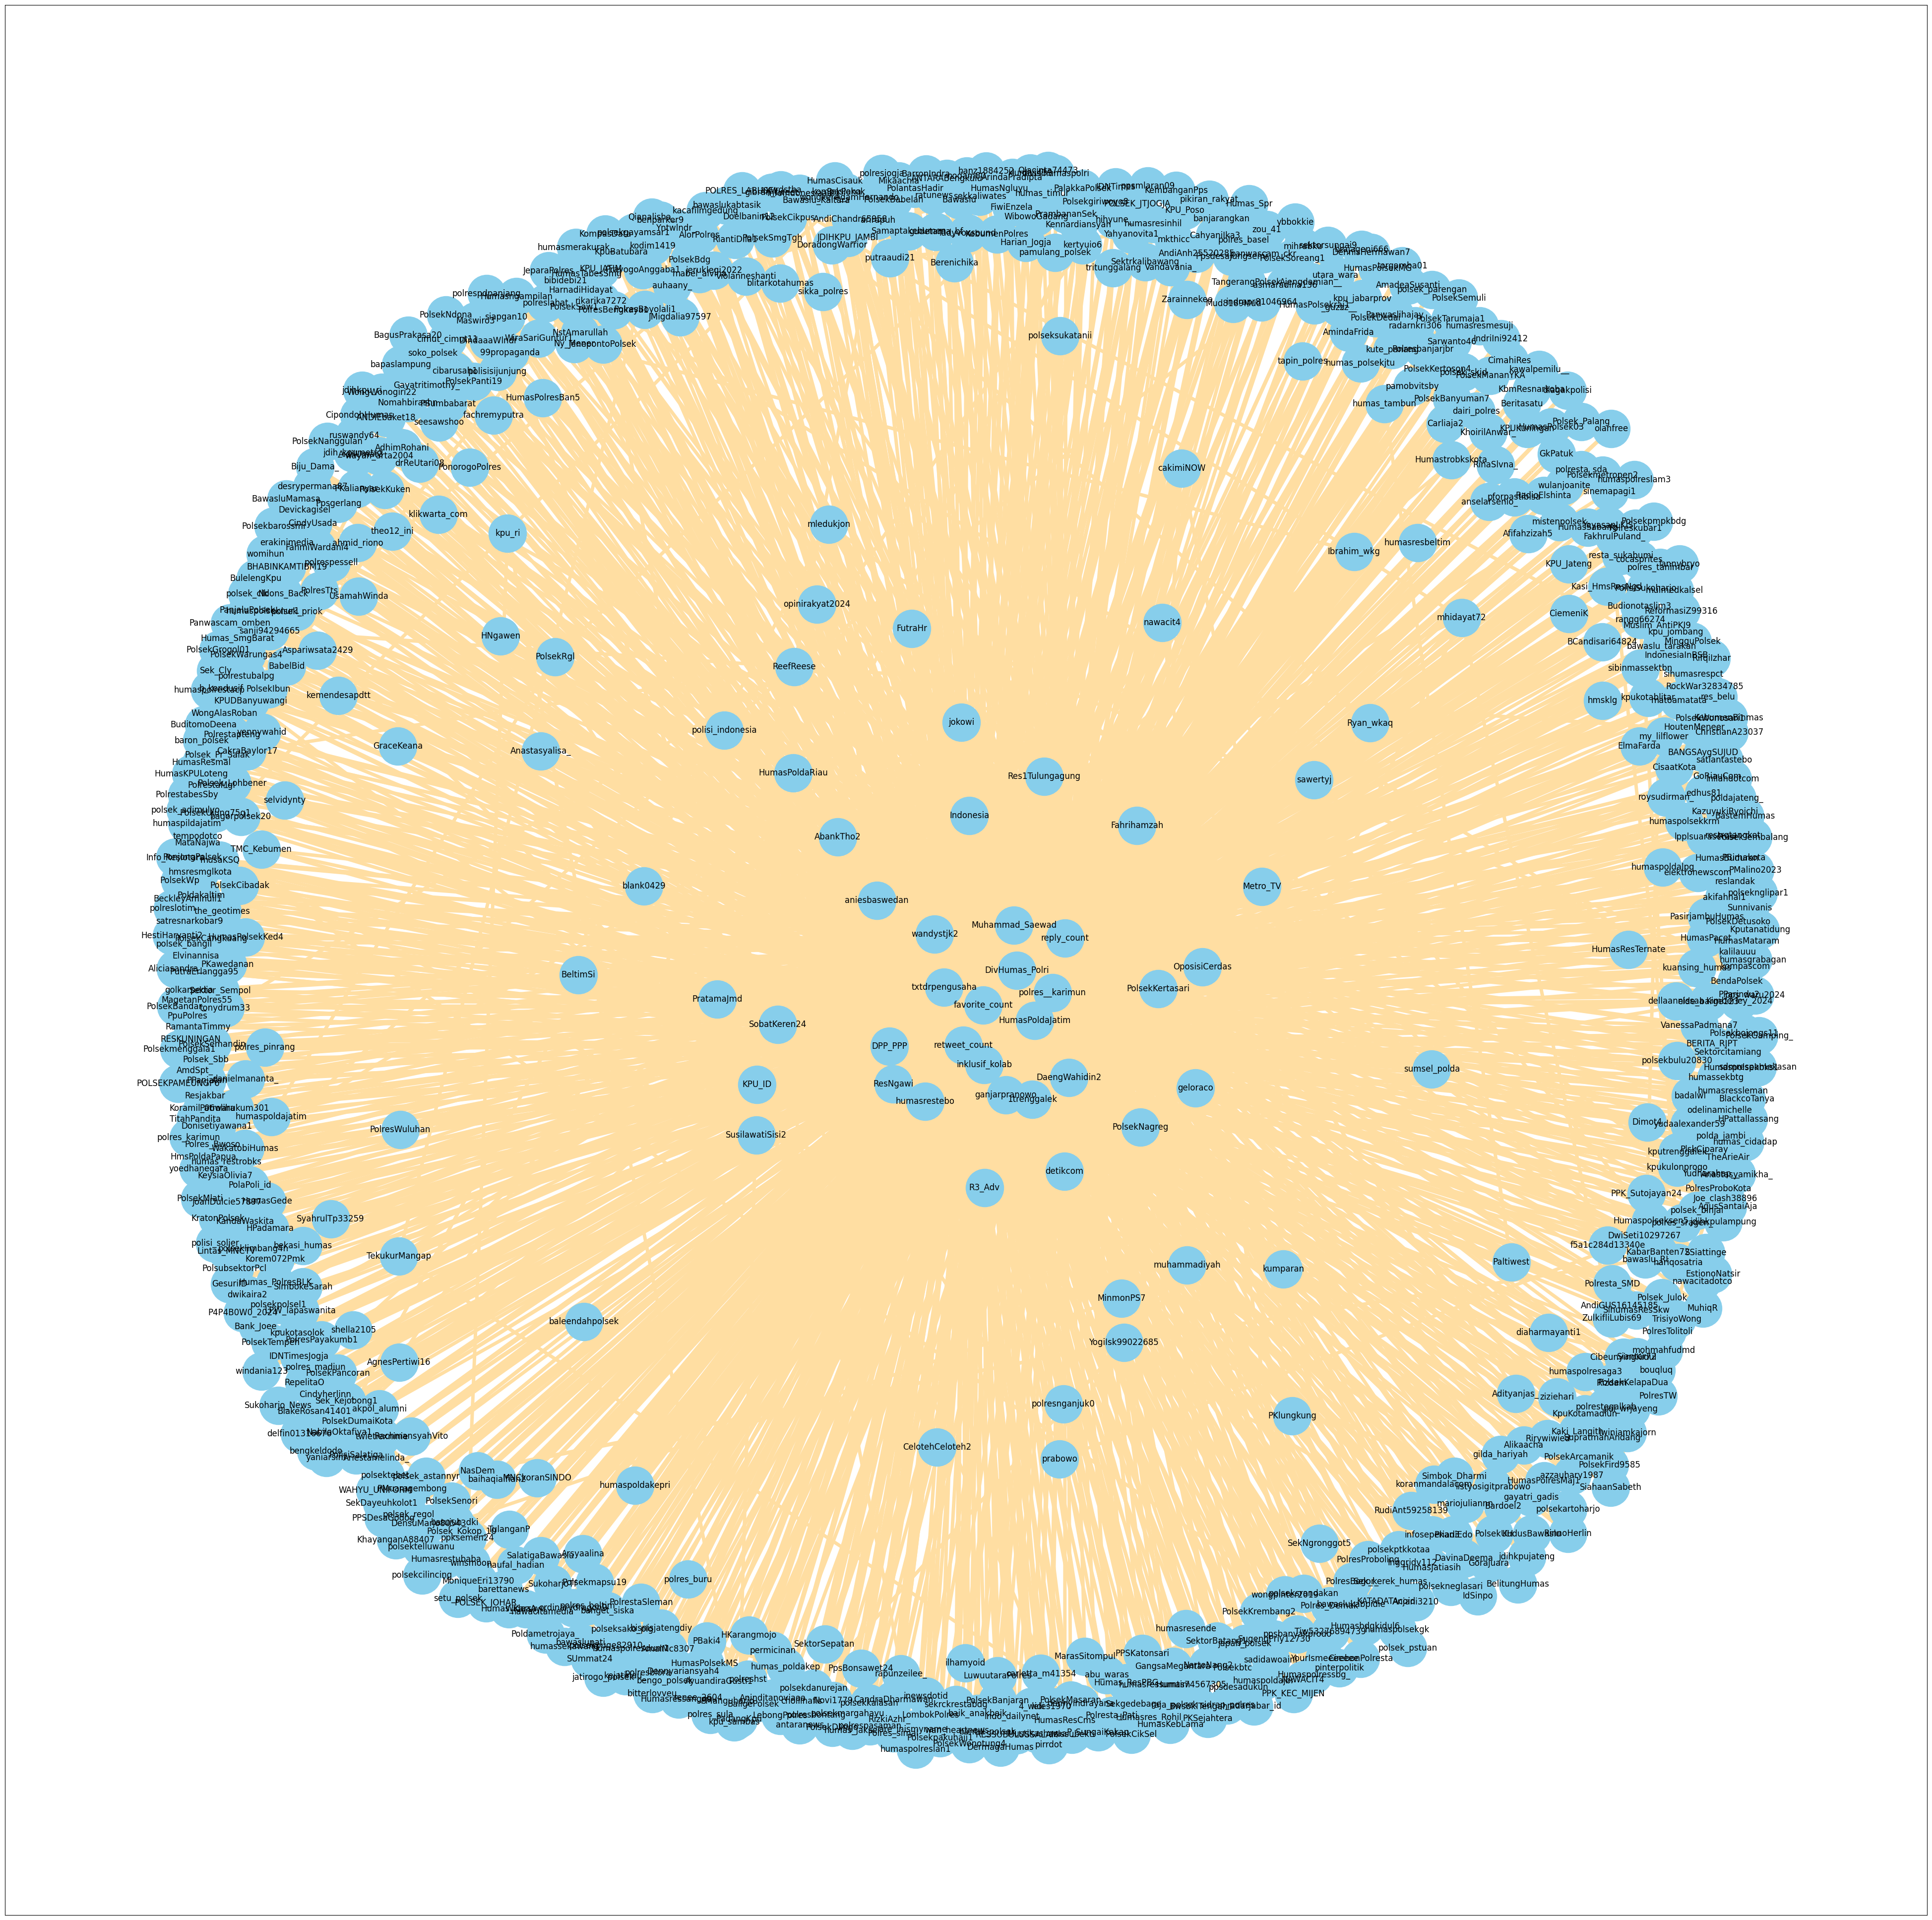

In [27]:
draw_graph(G, size=(50,50))